In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
def vary_threads(executable_file):
    li = []
    for th in range(2, 17, 2):
        # Open file inp-params.txt
        f = open("inp-params.txt", "w")
        f.write(f"{th} 5000 2.0")
        f.close()
        li_temp = []
        for _ in range(5):
            # Run executable 5 times
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            # Read output file
            f1 = open("1.txt", "r")
            a = float(f1.readline())
            f1.close()
            li_temp.append(a)
        li.append(li_temp)
        # print(li)
    return li

In [3]:
def vary_numOps(executable_file):
    li = []
    for nu in range(1000, 6000, 1000):
        # Open file inp-params.txt
        f = open("inp-params.txt", "w")
        f.write(f"16 {nu} 2.0")
        f.close()
        li_temp = []
        for _ in range(5):
            # Run executable 5 times
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            # Read output file
            f1 = open("1.txt", "r")
            a = float(f1.readline())
            f1.close()
            li_temp.append(a)
        li.append(li_temp)
        # print(li)
    return li

In [10]:
# f = open("1.txt", "r")
# # read a decimal number
# a = float(f.readline())
# f.close()
# print(a)

50.5875


In [4]:
mrmw_vary_thread = vary_threads("MRMW_custom")
print(mrmw_vary_thread)

[[37.8418, 43.4528, 47.7489, 35.2805, 47.0196], [55.157, 57.5916, 47.2773, 63.8605, 46.8768], [42.6981, 25.2752, 37.472, 62.7456, 63.5262], [69.5122, 65.0218, 69.52, 65.6897, 66.7488], [69.6311, 66.0042, 58.1195, 69.6901, 64.7875], [55.2846, 55.494, 62.5327, 65.9074, 72.6828], [61.474, 63.8734, 64.344, 69.39, 71.3767], [70.677, 43.5367, 27.6866, 33.7865, 48.6823]]


In [5]:
atomic_vary_thread = vary_threads("MRMW_atomic")
print(atomic_vary_thread)

[[37.7096, 45.2749, 37.9757, 43.256, 42.022], [49.3615, 31.9664, 30.542, 55.1202, 29.043], [38.2731, 65.2049, 61.019, 31.0673, 32.0991], [28.8694, 39.2908, 51.0177, 46.0718, 55.1362], [75.0812, 68.8375, 81.8121, 80.1676, 81.4731], [89.292, 88.2733, 89.6102, 89.3674, 90.7869], [98.4742, 97.5499, 99.5275, 100.2572, 99.3441], [110.4461, 111.035, 114.1686, 108.6511, 115.9279]]


In [6]:
mrmw_vary_numOps = vary_numOps("MRMW_custom")
print(mrmw_vary_numOps)

[[101.7356, 112.0759, 117.5171, 111.1072, 114.5989], [115.3164, 110.5868, 112.6425, 111.9771, 115.424], [107.0013, 111.2966, 114.7231, 111.0911, 111.8499], [110.9424, 110.7207, 113.8212, 110.1839, 113.4707], [108.0324, 112.8956, 112.2339, 111.3493, 114.2812]]


In [7]:
atomic_vary_numOps = vary_numOps("MRMW_atomic")
print(atomic_vary_numOps)

[[109.6236, 111.1015, 114.2186, 111.3736, 117.3118], [110.7641, 110.5928, 109.4259, 110.1984, 114.1132], [113.2019, 111.7767, 111.9851, 109.0332, 110.8536], [110.3394, 110.9084, 113.7781, 110.6442, 110.5238], [110.6884, 112.5454, 113.4903, 110.4814, 111.0183]]


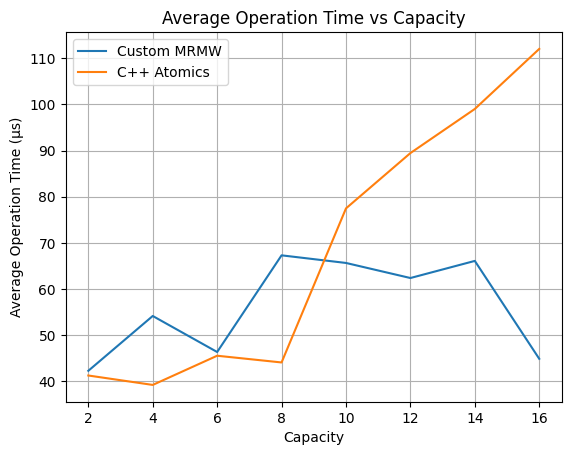

In [8]:
# Take the average of the 5 runs
mrmw_vary_thread_mean = np.mean(mrmw_vary_thread, axis=1)
atomic_vary_thread_mean = np.mean(atomic_vary_thread, axis=1)
# Thread array
thread_arr = np.arange(2, 17, 2)
# Plot
plt.plot(thread_arr, mrmw_vary_thread_mean, label="Custom MRMW")
plt.plot(thread_arr, atomic_vary_thread_mean, label="C++ Atomics")
plt.xlabel("Capacity")
plt.ylabel("Average Operation Time (\u03BCs)")
plt.title("Average Operation Time vs Capacity")
plt.legend()
plt.grid()
plt.show()

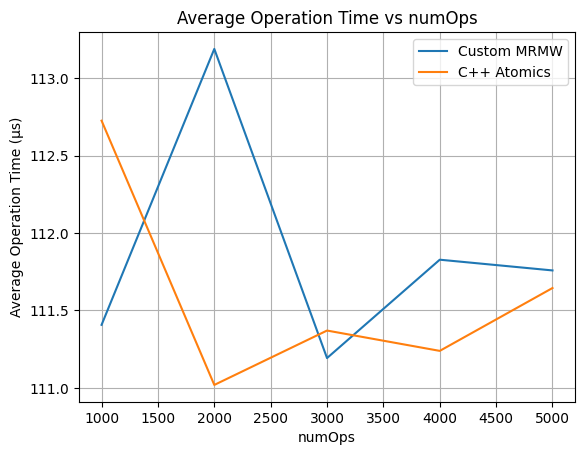

In [9]:
# Take the average of the 5 runs
mrmw_vary_numOps_mean = np.mean(mrmw_vary_numOps, axis=1)
atomic_vary_numOps_mean = np.mean(atomic_vary_numOps, axis=1)
# NumOps array
numOps_arr = np.arange(1000, 6000, 1000)
# Plot
plt.plot(numOps_arr, mrmw_vary_numOps_mean, label="Custom MRMW")
plt.plot(numOps_arr, atomic_vary_numOps_mean, label="C++ Atomics")
plt.xlabel("numOps")
plt.ylabel("Average Operation Time (\u03BCs)")
plt.title("Average Operation Time vs numOps")
plt.legend()
plt.grid()
plt.show()